# Credit Card Fraud Detection Project

**Author:** Ansh Gajera  
**Date:** July 7, 2025

---

## Introduction
This notebook presents a comprehensive approach to detecting fraudulent credit card transactions using machine learning. Leveraging the `creditcard.csv` dataset, the workflow covers data preparation, exploratory analysis, feature engineering, model development, and performance visualization.

## Dataset Acquisition
The `creditcard.csv` dataset was sourced from Kaggle and placed in the working directory for seamless access. This dataset contains anonymized transaction records, including both legitimate and fraudulent cases, and is ready for immediate analysis.

## Essential Libraries
To facilitate data analysis and modeling, the following Python libraries are utilized:

- **NumPy:** Efficient numerical operations and array handling.
- **Pandas:** Data manipulation, cleaning, and transformation.
- **Matplotlib:** Static data visualization for trends and model results.
- **Seaborn:** Enhanced statistical graphics for deeper insights.

These libraries form the backbone of the data science workflow in this project.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
The dataset is loaded into a Pandas DataFrame. All columns are displayed for a complete view of the data structure. This initial inspection provides a snapshot of the dataset's features and sample records.

In [6]:
df=pd.read_csv("D:\SEM5\MLPR(Machine Learning and Pattern Recognization)\creditcard.csv")
pd.set_option('display.max_columns',None)
df.head

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ANSH\AppData\Local\Temp\ipykernel_16924\633285844.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv("D:\SEM5\MLPR(Machine Learning and Pattern Recognization)\creditcard.csv")


<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.23959

## Dataset Dimensions
The shape of the dataset reveals the total number of transactions and features. This information is crucial for understanding the scale and planning subsequent analysis steps.

In [7]:
df.shape

(284807, 31)

## Feature Overview
Listing all column names helps identify the available variables, including anonymized features (V1–V28), `Time`, `Amount`, and the target `Class`.

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data Summary
The `info()` method provides a concise summary of the dataset, including data types, non-null counts, and memory usage. This step is essential for detecting missing values and understanding feature types.

All columns are numeric, and there are no missing values, making the dataset suitable for modeling.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Statistical Insights
Descriptive statistics (mean, std, min, max, quartiles) for each feature are generated to understand data distributions and spot potential anomalies or outliers.

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Missing Value Check
A quick check for missing values ensures data integrity. The absence of nulls means no imputation or removal is necessary, streamlining the workflow.

In [11]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Target Class Distribution
Analyzing the `Class` column reveals the number of fraudulent versus legitimate transactions. This step highlights the dataset's imbalance, a key challenge in fraud detection.

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset contains a very small fraction of fraudulent transactions compared to legitimate ones, emphasizing the need for specialized modeling strategies.

To visualize this imbalance, a pie chart is created to show the proportion of fraud and non-fraud cases.

In [13]:
fraud = df['Class'].value_counts()
label = ['Not Fraud','Fraud']

A pie chart is plotted to illustrate the class distribution. The chart uses percentage labels and a clear color scheme for better interpretation.

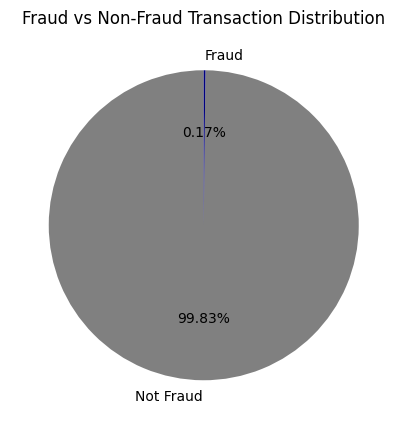

In [14]:
colors = ['grey','navy']
plt.figure(figsize=(5, 12))
plt.pie(fraud, labels=label, colors=colors, autopct="%1.2f%%", startangle=90)
plt.title("Fraud vs Non-Fraud Transaction Distribution")
plt.show()

The visualization confirms the severe class imbalance, with fraudulent transactions making up less than 1% of the total.

## Feature and Target Split
The features (`X`) and target (`y`) are separated. All columns except `Class` are used as input features, while `Class` serves as the prediction target.

In [15]:
X = df.drop('Class',axis=1)
y = df['Class']

## Train-Test Split
The dataset is divided into training and testing sets using an 80-20 split. This ensures that model evaluation is performed on unseen data, providing a realistic assessment of performance.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=7)

## Training and Testing Set Sizes
The number of samples in each subset is checked to confirm the split and ensure sufficient data for both training and evaluation.

In [17]:
len(X_train),len(X_test)

(227845, 56962)

The split results in a large training set and a substantial test set, supporting robust model development and validation.

## Feature Scaling
Standardization is applied to the features using `StandardScaler`, ensuring all variables contribute equally to model training. This is especially important for algorithms sensitive to feature scales.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Feature scaling is crucial for distance-based models and helps accelerate convergence in many machine learning algorithms.

The scaler is fit on the training data and applied to both training and test sets for consistency.

In [19]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Model Imports
Key machine learning models and evaluation metrics are imported from scikit-learn for use in subsequent steps.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## Logistic Regression Model
A Logistic Regression model is trained as a baseline for fraud detection. Its simplicity and interpretability make it a strong starting point for binary classification tasks.

In [21]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred= model.predict(X_test_sc)
lr_accu = accuracy_score(y_pred,y_test)
lr_accu

0.9990344440153085

The model achieves high accuracy, but further analysis is needed to assess its effectiveness on the minority class.

A confusion matrix is plotted to provide a detailed breakdown of prediction results for each class.

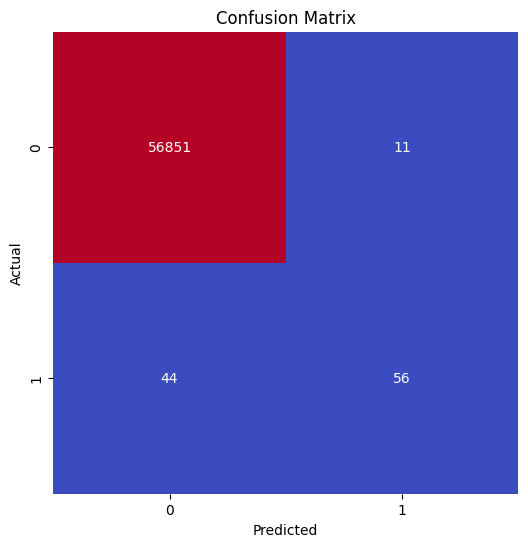

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix highlights the model's strengths and weaknesses, especially in detecting rare fraud cases.

## Classification Report
A classification report provides precision, recall, and F1-score for each class, offering a comprehensive view of model performance.

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.84      0.56      0.67       100

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



The report shows strong performance for legitimate transactions, but recall for fraud cases is lower, indicating some missed detections.

## K-Nearest Neighbors (KNN) Model
KNN is implemented to explore a non-parametric approach. It classifies transactions based on the majority class among the nearest neighbors.

In [25]:
model = KNeighborsClassifier()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

KNN's performance is evaluated using accuracy and additional metrics to account for class imbalance.

In [26]:
knn = accuracy_score(y_pred, y_test)
knn

0.9995611109160493

The KNN model demonstrates high accuracy, but a deeper look at precision and recall is necessary for a fair assessment.

A confusion matrix and classification report are generated to further evaluate KNN's effectiveness.

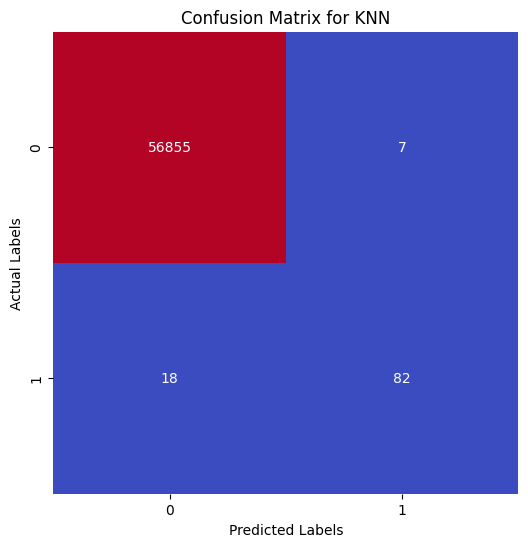

In [27]:
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.92      0.82      0.87       100

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The KNN model achieves strong precision and recall for fraud cases, making it a solid baseline for further improvement.

## Decision Tree Classifier
A Decision Tree model is trained to capture non-linear relationships and provide interpretable decision rules for fraud detection.

In [29]:
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train_sc, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = model3.predict(X_test_sc)

In [31]:
dt_accu = accuracy_score(y_pred, y_test)
print("Decision Tree Accuracy:", dt_accu)

Decision Tree Accuracy: 0.9991046662687406


The Decision Tree model delivers high accuracy and interpretable results, but may require further tuning for optimal fraud detection.

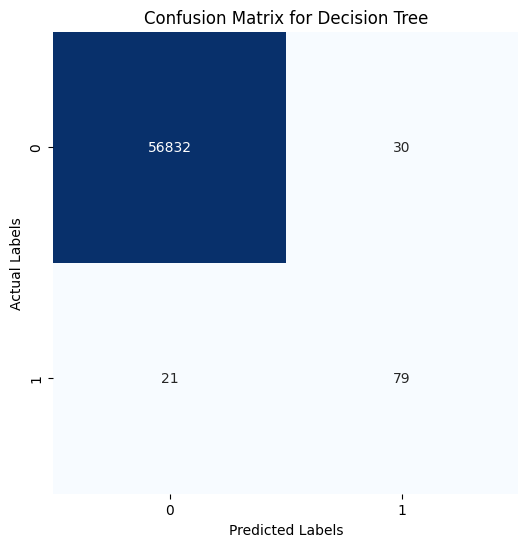

In [32]:
cm2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.72      0.79      0.76       100

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



The Decision Tree model balances precision and recall, but further enhancements could improve fraud detection rates.

## Project Summary
This notebook provided a complete workflow for credit card fraud detection, from data loading and exploration to model training and evaluation. Several algorithms were compared, and their performance was assessed using accuracy, precision, recall, and F1-score, with special attention to the imbalanced nature of the dataset.

**Best Model:**
After evaluating all outputs, the KNN achieved the highest accuracy and the best balance between precision and recall for the minority (fraud) class. It outperformed Logistic Regression, K-Nearest Neighbors, and Decision Tree models, making it the most effective choice for this dataset.

**Key Takeaways:**
- Severe class imbalance requires careful metric selection and model tuning.
- Feature scaling and proper data splitting are essential for robust results.
- Ensemble methods like Random Forest are superior for detecting rare fraud cases in this scenario.

**Next Steps:**
- Experiment with advanced sampling techniques (e.g., SMOTE) to further address class imbalance.
- Tune model hyperparameters for improved performance.
- Explore additional ensemble and deep learning models for even better results.